---
title: Regression assumptions and hypothesis testing
teaching: 45
exercises: 2
keypoints:
- "All models are wrong, but some are useful."
- "Before reading into a model's estimated coefficients, modelers must take care to test the 5 assumptions of linear regression."
objectives:
- "Understand how to assess the validity of a multivariate regression model." 
- "Understand how to use statistics to evaluate the likelihood of existing relationships recovered by a multivariate model."
questions:
- "How can multivariate models be used to detect interesting relationships found in nature?"
- "What are the assumptions of linear regression models?"
- "How can we rigorously evaluate the validity and accuracy of a multivariate regression model?"
---

### Intro
With the help of statistical tests and a careful consideration of the phenonemon in study, multivariate regression models can help us test the existence of interesting relationships found in nature. How can we rigorously determine if a regression model is detecting relationships (i.e., non-zero slopes or model coefs) that truly exist? 

There are three critical questions we must ask before we can read too far into our model's estimations. We will discuss all three in detail throughout this episode.
1. **Accounting for relevant predictors**: Have we included as many relevant predictors in the model as possible?
2. **Regression assumptions**: Does the fitted model follow the 5 assumptions of linear regression?
3. **Bias/variance or under/overfitting**: Does the model capture the variability of the target variable well? Does the model generalize well?

### Regression assumptions and hypothesis testing
What does it mean to be statistically signficiant? It means that an observed relationship is unlikely (< 5% chance if p=.005) to occur due to chance alone. 

To run statistics on a regression model, we start with two hypotheses — one null and one alternative.
* $H_0$ (Null hypothesis): $m$ = 0 (i.e., slope is flat)
* $H_A$ (Alternative hypothesis): $m \neq 0$ (i.e.., slope is not completely flat) 

In other words, we are testing to see if a predictor has a consistent effect on some target variable. We are NOT testing the magnitidute of the effect; simply whether or not an observed effect is due to chance or not. In statistics, we start with the null hypothesis as our default and review evidence (the fitted model and its estimated parameters and error measurement) to see if the observed data suggests that the null hypothesis should be rejected.

#### Linear regression assumptions
The assumptions of regression (mostly) need to be met before rejecting the null hypothesis because violating these assumptions can lead to biased and unreliable parameter estimates, incorrect standard errors, and misleading hypothesis test results. Failing to meet the assumptions can compromise the validity and interpretability of the regression model. When testing multivariate models for signficant coefficients, the following assumpitons should be met to assure validty of results.
1. **Linearity**: There is a linear relation between Y and X
2. **Normality**: The error terms (residuals) are normally distributed
3. **Homoscedasticity**: The variance of the error terms is constant over all X values (homoscedasticity)
4. **Independence**: The error terms are independent
5. **Limited multicollinearity among predictors**: This assumption applies to multivariate regression models but is not relevant in univariate regression since there is only one predictor variable. Multicollinearity refers to the presence of high correlation or linear dependence among the predictor variables in a regression model. It indicates that there is a strong linear relationship between two or more predictor variables. Multicollinearity can make it challenging to isolate the individual effects of predictors and can lead to unstable and unreliable coefficient estimates. It primarily focuses on the relationships among the predictors themselves. 

#### Testing procedure
The procedure for testing whether predictor(s) have a statistically significant effect on a target variable in a regression model typically involves the following steps:

1. Formulate the null hypothesis (H₀) and alternative hypothesis (H₁) for the test. The null hypothesis typically states that the predictor has no effect on the response variable (coef=0), while the alternative hypothesis suggests that there is a significant effect (coef!=0).

2. If using multiple predictors, check for multicollinearity. This can be an especially pervasive 

3. Check linearity assumption for all predictors

4. Fit the regression model: Use the appropriate regression method (e.g., ordinary least squares, logistic regression) to fit the regression model to your data. Obtain the estimated coefficients for each predictor, along with their standard errors.

5. Evaluate normality of errors

6. Calculate the test statistic: Calculate the test statistic based on the estimated coefficient and its standard error. The test statistic depends on the specific regression model and hypothesis being tested. Common test statistics include t-statistic, z-statistic, or F-statistic.

6. Determine the critical value: Determine the critical value or significance level (α) at which you want to test the hypothesis. The significance level typically ranges from 0.01 to 0.05, depending on the desired level of confidence.

7. Compare the test statistic and critical value: Compare the calculated test statistic with the critical value. If the test statistic falls within the critical region (i.e., the calculated p-value is less than the significance level), you reject the null hypothesis and conclude that the predictor is statistically significant. If the test statistic does not fall within the critical region, you fail to reject the null hypothesis, indicating that the predictor is not statistically significant.

8. Interpret the results: Based on the conclusion from the hypothesis test, interpret the significance of the predictor. If the predictor is deemed statistically significant, it suggests that there is evidence of a relationship between the predictor and the response variable. If the predictor is not statistically significant, it implies that there is no significant evidence of an effect.

It's important to note that significance tests provide statistical evidence for or against the null hypothesis, but they should be interpreted alongside other factors such as effect size, practical significance, and the context of the problem being studied. Additionally, it's crucial to consider the assumptions and limitations of the regression model and the underlying data when interpreting the model.

### 0. Load and prep data
For this episode, we'll explore the impact of adding additional preditors to our model, as well as how to rigorously evaluate the statistics of the model.

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True, parser='auto') #

Let's assume we have two predictors recorded in this dataset — sale condition and OverallQual. What values can the sale condition variable take?

In [7]:
y=housing['target']
new_predictor = 'SaleCondition'#'SaleType'#'Heating' #  SaleCondition
predictors = ['OverallQual', new_predictor]#'YrSold']#, 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
X=housing['data'][predictors]
print(X.head())
print(X[new_predictor].unique())

   OverallQual SaleCondition
0            7        Normal
1            6        Normal
2            7        Normal
3            7       Abnorml
4            8        Normal
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


Below code is a quick fix that would take care of issue of violating assumption of normality. However, I think with how small we deviate from normality, better to just leave it in as a more realistic example. Normality assumption is not quite as strict as some others (e.g., multicollinearity).

In [8]:
# # Calculate the lower and upper thresholds based on percentiles
# lower_threshold = y.quantile(0.05)  # 5th percentile
# upper_threshold = y.quantile(0.95)  # 95th percentile

# # Filter the DataFrame and Series based on the thresholds
# X = X.loc[(y >= lower_threshold) & (y <= upper_threshold), ]
# y = y[(y >= lower_threshold) & (y <= upper_threshold)]

In [9]:
with open('Ames_data_readme.txt', 'w') as f:
    f.write(housing.DESCR)

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

#### Encode categorical data as multiple binary predictors

In [10]:
import pandas as pd
# one-hot encoding
# Get one hot encoding of columns B
one_hot = pd.get_dummies(X[new_predictor])
one_hot.head()

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [11]:
one_hot.sum()

Abnorml     101
AdjLand       4
Alloca       12
Family       20
Normal     1198
Partial     125
dtype: int64

In [12]:
# Drop column SaleCondition as it is now encoded
X = X.drop(new_predictor,axis = 1)
# Join the encoded df
X = X.join(one_hot)
X.head()

,OverallQual,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,7,0,0,0,0,1,0
1,6,0,0,0,0,1,0
2,7,0,0,0,0,1,0
3,7,1,0,0,0,0,0
4,8,0,0,0,0,1,0


### 1. Specify hypotheses
We begin by formulating the null hypothesis (H₀) and alternative hypothesis (H₁) for each predictor we intend to include in the model. The null hypothesis states that the predictor has no effect on the response variable, while the alternative hypothesis suggests that there is a significant effect. Before we can reject the null hypothesis, we must make sure to satisfy all multivariate regression assumptions to ensure reliable and valid inference.

### 2. Check for multicollinearity 

"Multicollinearity creates a problem in the multiple regression model because the inputs are all influencing each other. Therefore, they are not actually independent, and it is difficult to test how much the combination of the independent variables affects the dependent variable, or outcome, within the regression model.

While multicollinearity does not reduce a model's overall predictive power, it can produce estimates of the regression coefficients that are not statistically significant. In a sense, it can be thought of as a kind of double-counting in the model.

In statistical terms, a multiple regression model where there is high multicollinearity will make it more difficult to estimate the relationship between each of the independent variables and the dependent variable. In other words, when two or more independent variables are closely related or measure almost the same thing, then the underlying effect that they measure is being accounted for twice (or more) across the variables. When the independent variables are closely-related, it becomes difficult to say which variable is influencing the dependent variables."

TODO: About VIF score and why you want values lower than 10

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor in X
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)

      Variable        VIF
0  OverallQual   1.128173
1      Abnorml   2.268743
2      AdjLand   1.040428
3       Alloca   1.142339
4       Family   1.271997
5       Normal  18.474457
6      Partial   3.888230


It looks like one of the predictors, "Normal", has a high VIF score. We can further investigate this score by creating a plot of the correlation matrix of all predictors.

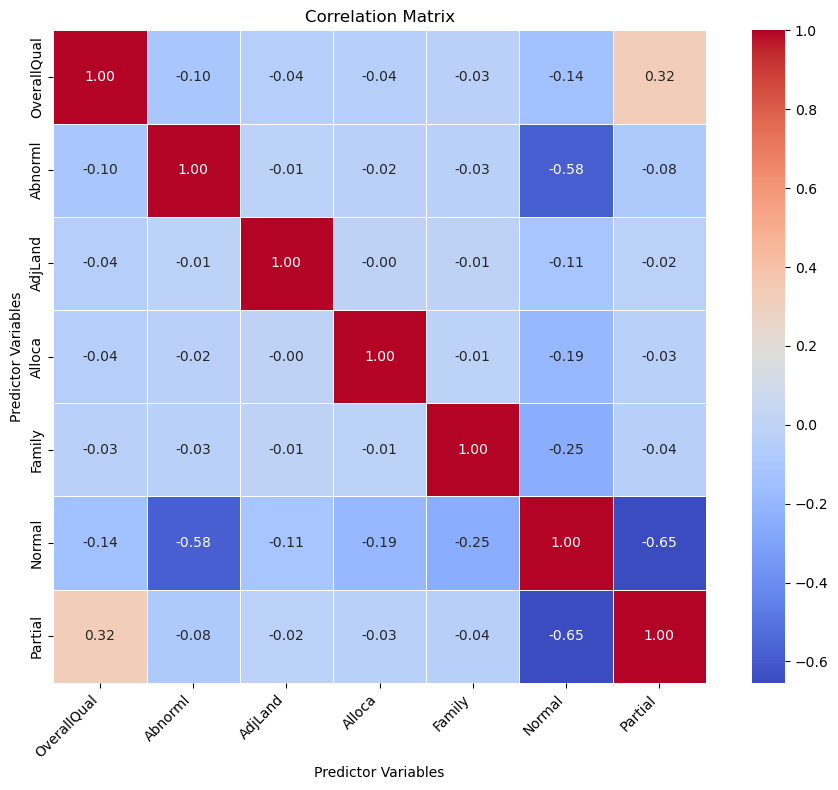

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from helper_functions import plot_corr_matrix 

# Calculate correlation matrix
corr_matrix = X.corr()
plot_corr_matrix(corr_matrix)


SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

The Normal variable appears to be highly negatively correlated with both Partial and Abnormal. In fact, Normal has a considerable amount of negative corrleation with all predictors. If we think about our predictors holistically, it appears we have several categories describing somewhat rarer sale conditions, and then a more common/default "normal" condition. Regardless of the value of "Normal", if all other predictors are set to 0, that is a very good indication that it was a "Normal" sale. Since "Normal" tends to negate the remaining predictors presense, it makes sense to remove it form the list of predictors and only consider the manner in which the sale was unusal. 

In [15]:
X = X.drop('Normal',axis = 1)


After dropping the problematic variable with multicollinearity, we can recalculate VIF for each predictor in X


      Variable       VIF
0  OverallQual  1.249628
1      Abnorml  1.068676
2      AdjLand  1.002188
3       Alloca  1.007705
4       Family  1.014723
5      Partial  1.156336


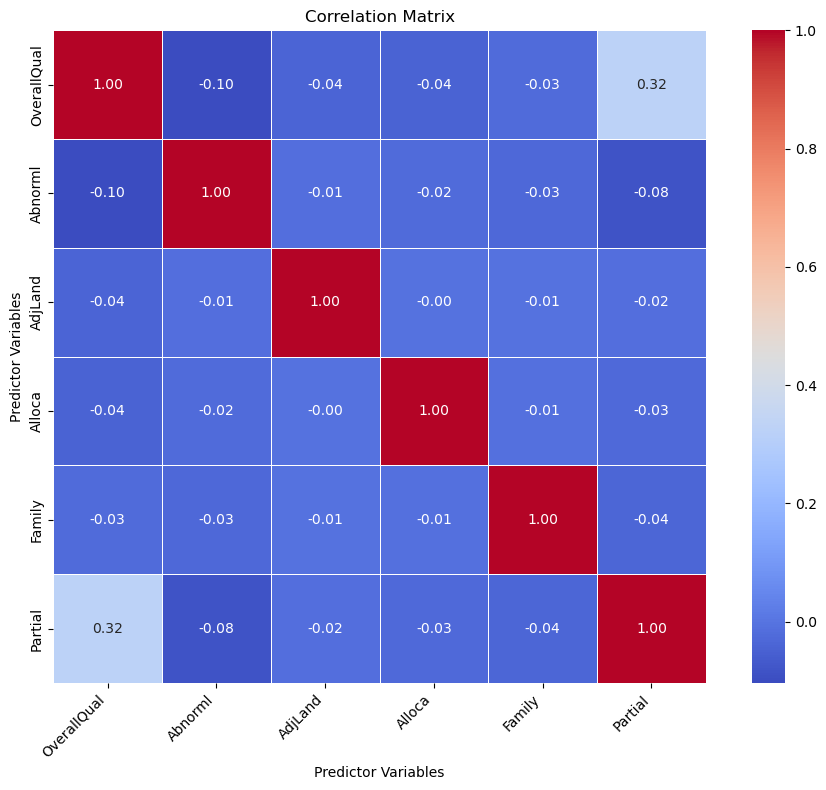

In [16]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)

# Calculate correlation matrix
corr_matrix = X.corr()
plot_corr_matrix(corr_matrix)

### 3. Check linearity assumption
How can we test if a linear model is appropriate for this data? A good method to start with is to simply plot scatterplots between each predictor variable and the target variable

#### Why do we care?
As discussed in the previous episode, the predictions will be inaccurate because our model is underfitting (i.e., not adquately capturing the variance of the data since you can't effectively draw a line through nonlinear data). In addition to having a fatal impact on predictive power, violations of linearity can affect the validity of hypothesis tests on the regression coefficients. The p-values associated with the coefficients may not accurately reflect the statistical significance, potentially leading to erroneous conclusions. For example, if nonlinearity is present, the p-values may be underestimated, making some predictors appear statistically significant when they are not or vice versa.

Violations of the linearity assumption can also impact other assumptions in statistical tests. For example, violations of linearity may be associated with heteroscedasticity (unequal variances) or autocorrelation (dependence between residuals), which violate assumptions of independence and constant variance in regression models. This can affect the reliability and validity of other statistical tests or model diagnostics.

#### How to remedy
To fix this problem, you can...

1. Apply nonlinear transformations (e.g., log transform)
2. Try adding additional variables to help capture the relationship between the predictors and the label. 
3. Add polynomial terms to some of the predictors (i.e., polynomial regression) 


If none of those approaches work, you can also consider nonlinear models if you have a sufficiently large dataset (learning nonlinear relationships requires lots of data).

Recall that we observed a nonlinear trend between OverallQual and SalePrice in the previous episode, but log transforming SalePrice fixed this issue. Let's see if the remaining predicotrs have a linear trend with log(SalePrice).

In [ ]:
import matplotlib.pyplot as plt
# Number of predictor variables (change as per your dataframe)
num_predictors = X.shape[1]
import numpy as np
y_log = y.apply(np.log)

# Create subplots for scatterplots
fig, axes = plt.subplots(nrows=num_predictors, ncols=1, figsize=(5, 3*num_predictors))
fig.subplots_adjust(hspace=0.5)

# Iterate over predictor variables and create scatterplots
for i, predictor in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X[predictor], y_log, alpha=.03)
    ax.set_xlabel(predictor)
    ax.set_ylabel('Target Variable')
    ax.set_title(f'Scatterplot of {predictor} vs Target Variable')

# Show the scatterplots
plt.tight_layout()
plt.show()

It can be challenging to evaluate linearity when looking at binary predictors since binary predictors are inherently nonlinear. What we're looking for in these plots is a change in the mean sale price when each predictor's value changes from 0 to 1. It looks like the Partial variable a clear linear trend. The remaining variables may have a mild linear impact on saleprice, but it is difficult to tell by these scatterplots alone. We will see later how we can more rigorously evaluate the liearity assumption after fitting our regression model.

#### Train/test split
Discuss why stats should be evaluated on test set error.

In [ ]:
# TODO: Train/test split

### 4. Fit the model

In [ ]:
import statsmodels.api as sm

# Add a constant column to the predictor variables dataframe
X = sm.add_constant(X)

# Fit the multivariate regression model
model = sm.OLS(y_log, X)
results = model.fit()



In [ ]:
X.head()

In [ ]:
# Generate predictions
predictions = results.predict(X)

# Print the predictions
print(predictions)
plt.scatter(y_log,predictions)
ax = plt.gca()
ax.set_aspect('equal')
ax.xlabel('true')
ax.ylabel('predicted')

# ax1.axis('equal')

ax.plot([0, 1], [0, 1], transform=ax.transAxes)

### 5. Evaluate normality of residuals assumption
In general, the violation of the assumption of normality of errors in a linear regression model does not automatically invalidate the ability to reject the null hypothesis. While the assumption of normality of errors is important for making valid statistical inferences and obtaining accurate p-values, violations of this assumption do not necessarily invalidate the estimated coefficients or render them meaningless. In some cases, even with departures from normality, the coefficient estimates can still be consistent and unbiased. However, it's important to interpret the results with caution and consider the potential impact of the violation on the reliability of the estimates.

If the normality assumption is significantly violated and it is crucial to rely on accurate p-values or confidence intervals, you may consider alternative statistical methods that are more robust to violations of normality. These methods include robust regression techniques or bootstrapping, which can provide valid inference even in the presence of non-normal errors.

It's also worth noting that the violation of the normality assumption can be assessed visually through diagnostic plots, such as QQ-plots or histograms of residuals, to get a sense of the departure from normality and understand the potential impact on the analysis.

In summary, while violations of the assumption of normality can impact the interpretation and reliability of the results, they do not necessarily invalidate the ability to reject the null hypothesis. It is important to carefully consider the specific context, magnitude of violations, and potential alternative methods that may be more appropriate for your analysis.

To test this assumption, we can create a **quantile-quantile plot (QQ-plot)** of the model residuals. Quantiles — often referred to as percentiles — indicate values in your data below which a certain proportion of the data falls. For instance, if data comes from a classical bell-curve Normal distrubtion with a mean of 0 and a standard deviation of 1, the 0.5 quantile, or 50th percentile, is 0 (half the data falls above 0, half below zero). The 90th percentile would lie right around @[INSERT_NUMBER]

@[INSERT_IMAGE_OF_NORMAL_DIST_WITH_QUANTILES_MARKED]

0.0016591071809379798


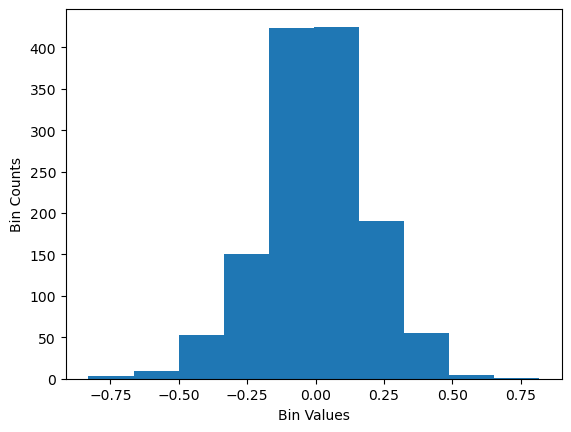

In [18]:
import statsmodels.graphics.gofplots as smg

# Extract the residuals
residuals = results.resid
print(np.median(residuals))
plt.hist(residuals);
plt.xlabel('Bin Values');
plt.ylabel('Bin Counts');

In [19]:
# To quantitatively assess a distribution's skewness, we can use pandas' skew() function
residuals.skew() 

-0.17041448711114435

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

Shapiro-Wilk test: statistic=0.9949, p-value=0.0002032356


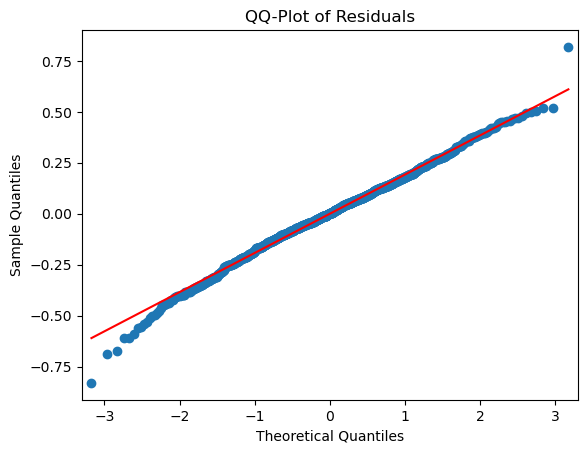

In [20]:
# Plot the QQ-plot of residuals
smg.qqplot(residuals, line='s')

# Add labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ-Plot of Residuals')

# Shapiro-Wilk test for normality
from scipy import stats
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.10f}")

plt.show()

#### Unpacking the QQ-plot
To construct a QQ-plot, the raw data is first sorted from smaller to larger values. Then, empirical quantiles can be assigned to each sample in the dataset. These measurements can then be compared to theoretical quantiles from a normal distribution. Oftentimes, QQ-plots show zscores rather than actual quantile values since zscores can be interpreted more easily. 

**X-axis: Theoretical Quantiles**
This x-axis represents nothing but Z-values/Z-scores of standard normal distribution.
0.5 quantile corresponds to 50th percentile i.e. at 0 Z-score.
90th percentile is approximately 1.282.
0.25 quantile or 25th percentile means -0.67 Z-score.
0.75 quantile or 75th percentile represents 0.67 Z-score.

**Y-axis: Sample Quantiles**
The y-axis captures the true z-scores of each observed sample in our dataset. The observed z-score can be compared to the expected z-score based on a datapoint's position in an ordered dataset.

**Red diagonal line**
Data drawn from a normal distribution fall along the line y = x in the Q-Q plot.

**Common Diagnostics**
1. Right-skewed: If the data falls above the red line (where y=x) where x > 0, that means that you have a right skewed distrution (long tail on the right side of the distrubtion). A right-skewed distribution will have have higher than expected z-scores for data that is greater than the mean (zscore = 0).
2. Left-skewed: If the data falls below the red line (where y=x) where x < 0, that means that you have a left skewed distrution (long tail on the left side of the distrubtion). This causes the sample distribtuion to have lower (more negative) than expected z-scores for data that is greater than the mean (zscore = 0).
3. Long tails / tall peak: Combination of 1&2 above — points below the mean (zscore = 0) will fall below the red line, and points above the mean will fall above the red line

#### **Can adding additional predictor variables fix violations of the assumption of normality?**
Adding additional predictor variables to a regression model may or may not fix violations of the assumption of normality, depending on the underlying reasons for the violation. In some cases, including additional predictors can help improve the approximation of the normality assumption, but it is not a guaranteed solution.

The assumption of normality in linear regression pertains to the errors or residuals of the model rather than the predictor variables themselves. The errors are the differences between the observed target variable values and the predicted values from the regression model. Violations of normality in the errors can arise due to various factors, such as outliers, non-linear relationships, or heteroscedasticity.

Adding more predictor variables can potentially capture more of the variation in the target variable and reduce the influence of certain factors that might contribute to non-normality in the errors. For example, if a non-linear relationship between a predictor and the target variable is causing the violation, adding additional predictors that capture the non-linear patterns may help improve the normality assumption.

However, it is important to note that adding more predictors does not guarantee the resolution of normality violations. The appropriateness of additional predictors depends on the underlying relationship with the target variable and the specific nature of the violations. In some cases, alternative modeling approaches or transformations of variables may be more effective in addressing non-normality.

It is crucial to carefully assess the assumptions, diagnose the sources of violations, and consider appropriate remedies based on the specific context and data characteristics.

To better understand QQ-plots, we'll first generate some example data from a normal distribution

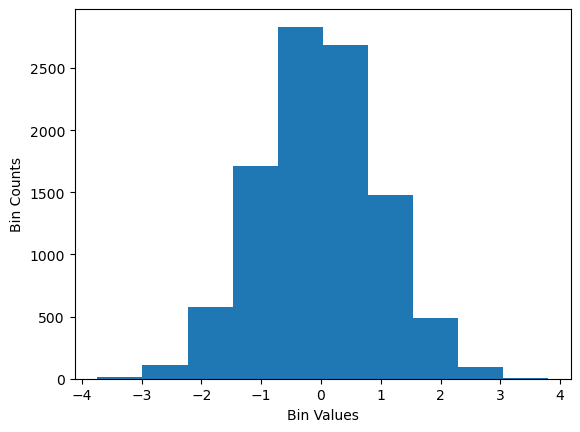

In [46]:
np.random.seed(0) # set seed for reproducibility
normal_data = np.random.normal(loc=0, scale=1, size=10000) # mean of 0, std of 1, 50 samples
normal_data.shape

plt.hist(normal_data);
plt.xlabel('Bin Values');
plt.ylabel('Bin Counts');

Shapiro-Wilk test: statistic=0.9998, p-value=0.7514184713


C:\Users\Endemann\anaconda3\envs\highdim_workshop\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


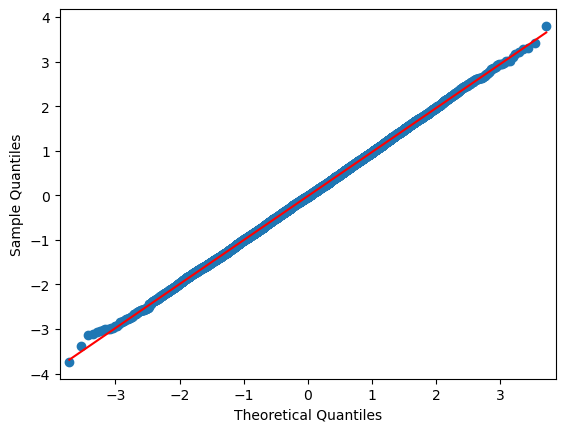

In [47]:
## create qq-plot
import statsmodels.api as sm
sm.qqplot(normal_data, line='s');

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(normal_data)
print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.10f}")

What happens if we decrease the sample size of our simulation? Let's try to generate a QQ-plot containing only 200 samples.

Shapiro-Wilk test: statistic=0.9887, p-value=0.1128277779


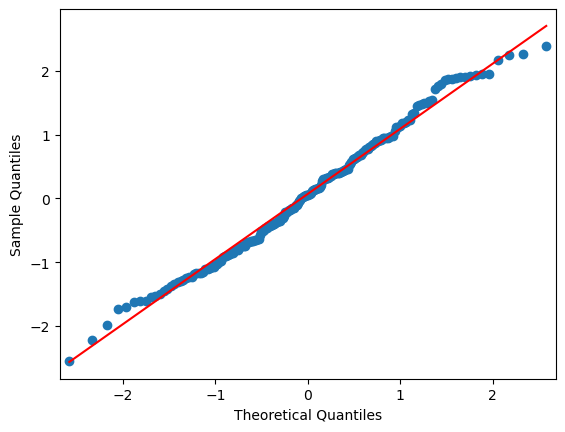

In [50]:
np.random.seed(0) # set seed for reproducibility
normal_data = np.random.normal(loc=0, scale=1, size=200) # mean of 0, std of 1, len(samples) = number of observations used to train/fit model
normal_data.shape

## create qq-plot
import statsmodels.api as sm
sm.qqplot(normal_data, line='s');

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(normal_data)
print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.10f}")

Notice how the SW test nearly fails even though this data comes from a normal distrition. Testing normality can be a difficult task when data is very limited. What happens if we decrease the sample size of our simulation? Let's try to generate a QQ-plot containing the same number of samples used to train our model.

Shapiro-Wilk test: statistic=0.9992, p-value=0.7804323435


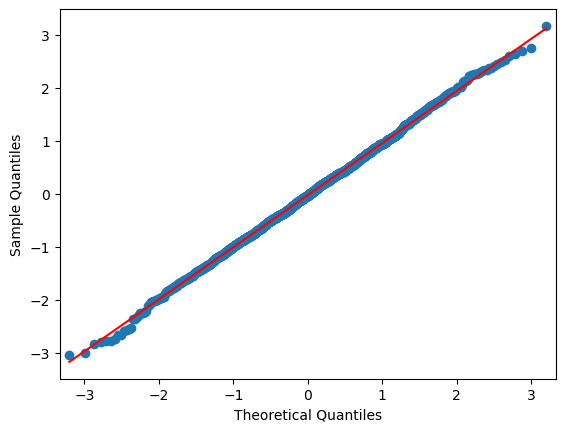

In [51]:
np.random.seed(0) # set seed for reproducibility
normal_data = np.random.normal(loc=0, scale=1, size=len(residuals)) # mean of 0, std of 1, len(samples) = number of observations used to train/fit model
normal_data.shape

## create qq-plot
import statsmodels.api as sm
sm.qqplot(normal_data, line='s');

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(normal_data)
print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.10f}")

**Common Diagnostics**
1. Right-skewed: If the data falls above the red line (where y=x) where x > 0, that means that you have a right skewed distrution (long tail on the right side of the distrubtion). A right-skewed distribution will have have higher than expected z-scores for data that is greater than the mean (zscore = 0).
2. Left-skewed: If the data falls below the red line (where y=x) where x < 0, that means that you have a left skewed distrution (long tail on the left side of the distrubtion). This causes the sample distribtuion to have lower (more negative) than expected z-scores for data that is greater than the mean (zscore = 0).
3. Long tails / tall peak: Combination of 1&2 above — points below the mean (zscore = 0) will fall below the red line, and points above the mean will fall above the red line

Now that we understand QQ-plots better, let's try creating a QQ-plot of the model residuals. 

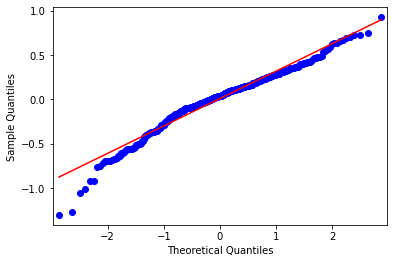

In [22]:
import statsmodels.api as sm

resid = y_pred_test_log - y_test_log
sm.qqplot(resid, line='s');

(array([  2.,   4.,  12.,  26.,  53., 138., 157.,  73.,  12.,   5.]),
 array([-1.30333711, -1.08048116, -0.85762522, -0.63476927, -0.41191333,
        -0.18905739,  0.03379856,  0.2566545 ,  0.47951045,  0.70236639,
         0.92522234]),
 <BarContainer object of 10 artists>)

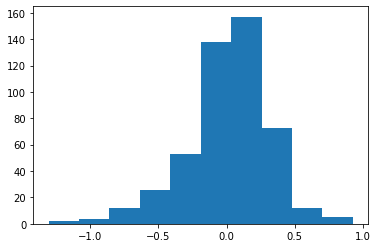

In [26]:
plt.hist(resid)

In [25]:
# Maybe include Shapiro-Wilk test of normality as well?
from scipy import stats
rng = np.random.default_rng()
# x = stats.norm.rvs(loc=5, scale=3, size=100, random_state=rng)
shapiro_test = stats.shapiro(resid)
shapiro_test

ShapiroResult(statistic=0.9669366478919983, pvalue=5.923087798009874e-09)

violations of normality often arise either because (a) the distributions of the dependent and/or independent variables are themselves significantly non-normal, and/or (b) the linearity assumption is violated.

Neither the dependent nor independent variable needs to be normally distributed. In fact they can have all kinds of loopy distributions. The normality assumption applies to the distribution of the errors (Yi−Yˆi).

### 5. Calculate the test statistic
t-statistic: The t-statistic is typically used to test the statistical significance of individual coefficient estimates in the regression model. It measures the ratio of the estimated coefficient to its standard error. The t-test helps assess whether a specific predictor variable has a significant effect on the response variable while accounting for the uncertainty in the coefficient estimate.

P-values for t-statistics are calculated based on the t-distribution. The t-distribution is a probability distribution that is used when the population standard deviation is unknown and needs to be estimated from the sample.

To calculate the p-value for a t-statistic, you follow these general steps:

1. Formulate the null hypothesis (H0) and alternative hypothesis (H1) for the test you are conducting.

2. Calculate the t-statistic for the test using the formula:

3. t = (estimate - null_value) / standard_error, where "estimate" is the estimated coefficient or difference, "null_value" is the value specified under the null hypothesis (often 0), and "standard_error" is the standard error of the coefficient or difference estimate.

4. Determine the degrees of freedom (df) for the t-distribution. In simple linear regression, the degrees of freedom are typically n - 2, where n is the number of observations. In multivariate regression, the degrees of freedom depend on the number of predictors and the sample size.

5. Look up the p-value associated with the calculated t-value and degrees of freedom in the t-distribution table or use statistical software to calculate it. The p-value represents the probability of observing a t-value as extreme as, or more extreme than, the calculated value under the null hypothesis.

6. Compare the p-value to the predetermined significance level (commonly 0.05). If the p-value is less than the significance level, you reject the null hypothesis in favor of the alternative hypothesis. If the p-value is greater than or equal to the significance level, you fail to reject the null hypothesis.

By calculating the p-value for the t-statistic, you can assess the statistical significance of the coefficient estimate or the difference being tested. A lower p-value indicates stronger evidence against the null hypothesis and suggests a more significant relationship or effect.

#### The more manual route of calculating p-values... 

In this code, after fitting the multivariate regression model and obtaining the coefficient estimates in the coefs Series and the standard errors in the std_errs Series, we calculate the t-values by dividing the coefficient estimates by the standard errors. The t-value represents the ratio of the estimated coefficient (or difference) to its standard error. It measures the number of standard errors by which the estimated coefficient differs from zero. The standard error reflects the precision of the estimated coefficient, and a larger t-value indicates a larger difference relative to the standard error.

Next, we use the t-values to calculate the two-sided p-values using the stats.t.sf function from the SciPy library. The np.abs(t_values) ensures that we consider the absolute values of the t-values to calculate the p-values for both positive and negative t-values. We multiply the resulting p-values by 2 to obtain the two-sided p-values. The p-value is the probability of observing a t-value as extreme as, or more extreme than, the one calculated, assuming the null hypothesis is true. By convention, if the p-value is smaller than a predetermined significance level (commonly 0.05), we reject the null hypothesis in favor of the alternative hypothesis, indicating that the coefficient is statistically significant.

Dividing the t-value by the standard error yields a test statistic that follows a t-distribution with degrees of freedom determined by the sample size and the complexity of the model. By looking up the p-value associated with the calculated test statistic in the t-distribution table or using statistical software, we can determine the probability of observing such an extreme or more extreme value. This probability is the p-value.

In summary, dividing the t-value by the standard error is a way to standardize the coefficient estimate and quantify its significance relative to its precision. The resulting test statistic follows a t-distribution, and by calculating the associated p-value, we can assess the statistical significance of the coefficient estimate and make inference about its relationship with the predictor variable.

In [14]:
from scipy import stats

# Get the coefficient estimates and standard errors
coefs = results.params
std_errs = results.bse

# Calculate the t-values and p-values
t_values = coefs / std_errs
p_values = stats.t.sf(np.abs(t_values), df=results.df_resid) * 2
p_values

array([0.00000000e+000, 3.04817753e-317, 6.46310958e-007, 3.00466819e-002,
       5.07432731e-001, 8.42504926e-002, 7.72268111e-005])

#### Quicker route

In [35]:
# Get the p-values of the predictors
p_values = results.pvalues
coefficients = results.params

# Create a DataFrame to store the p-values
p_values_df = pd.DataFrame({'Predictor': p_values.index, 'P-value': p_values, 'Coefficient': coefficients})

# Add a column indicating if p-value < 0.005
p_values_df['Significant'] = p_values_df['P-value'] < 0.05

# Print the DataFrame
print("P-values of the predictors:")
print(p_values_df)           

P-values of the predictors:
               Predictor        P-value  Coefficient  Significant
const              const   0.000000e+00    10.638446         True
OverallQual  OverallQual  3.048178e-317     0.227511         True
Abnorml          Abnorml   6.463110e-07    -0.117879         True
AdjLand          AdjLand   3.004668e-02    -0.246856         True
Alloca            Alloca   5.074327e-01     0.043658        False
Family            Family   8.425049e-02    -0.088357        False
Partial          Partial   7.722681e-05     0.089044         True
